# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [2]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [3]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [4]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [5]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [6]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [8]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [9]:
hist[4]

0

The `Values` method returns the values:

In [10]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [11]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [12]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

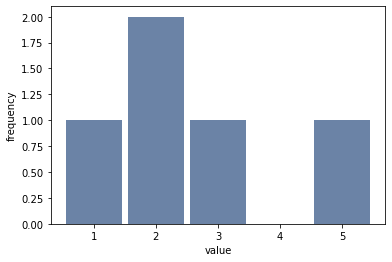

In [9]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [10]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

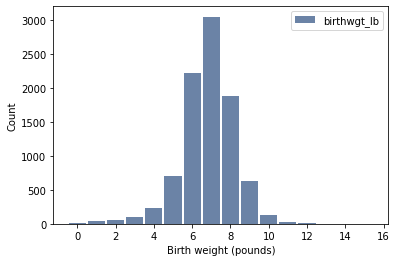

In [11]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [12]:
ages = np.floor(live.agepreg)

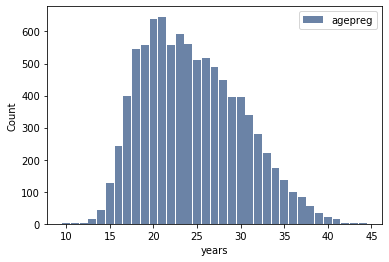

In [13]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Weeks')]

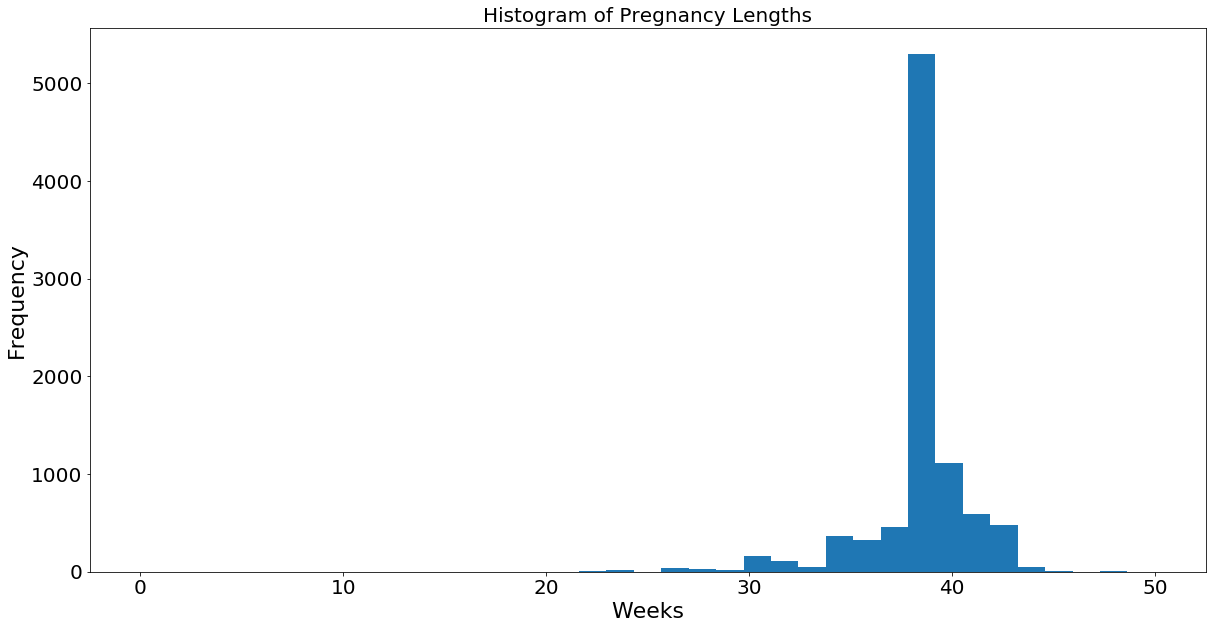

In [15]:
# Solution goes here
# Using matplotlib rather than built in (for this book) thinkplot package, as want practice with 'real thing'

import matplotlib.pyplot as plt

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

live.prglngth.plot(kind = 'hist', figsize = (20,10), title = 'Histogram of Pregnancy Lengths',
                  bins = len(live.prglngth.value_counts())).set(xlabel = 'Weeks', ylabel = 'Frequency')

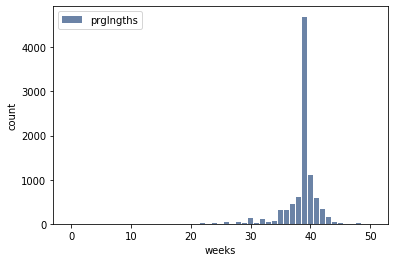

In [14]:
# or a solution using thinkplot, note the font sizes have been set by code above for matplotlib...

preg_lengths = live.prglngth
hist = thinkstats2.Hist(preg_lengths, label = 'prglngths')
thinkplot.Hist(hist)
thinkplot.Config(xlabel = 'weeks', ylabel = 'count', xticks = [0, 10, 20, 30, 40, 50])

`Hist` provides smallest, which select the lowest values and their frequencies.

In [20]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


Use `Largest` to display the longest pregnancy lengths.

In [21]:
# Solution goes here

for weeks, freq in hist.Largest(7):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [16]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

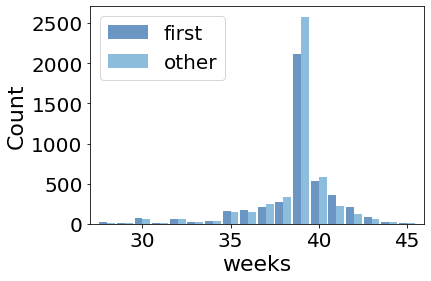

In [17]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46], yticks = [0, 500, 1000, 1500, 2000, 2500])

`Series` provides methods to compute summary statistics:

In [18]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [19]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [20]:
# Solution goes here
std * std == var

True

Here's are the mean pregnancy lengths for first babies and others:

In [21]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [22]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [7]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [23]:
# Solution goes here

CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [24]:
# Solution goes here

print("First babies are", CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb), 
      "std. deviations heavier than further babies.") # negative, so first babies are slightly lighter than further

print("This effect is small, but still larger than the difference in pregnancy length by about three times.")

First babies are -0.088672927072602 std. deviations heavier than further babies.
This effect is small, but still larger than the difference in pregnancy length by about three times.


For the next few exercises, we'll load the respondent file:

In [44]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

In [94]:
resp.totincr.unique()

array([ 9, 10,  5, 13,  6,  7, 12,  8,  2,  4, 11,  1,  3, 14],
      dtype=int64)

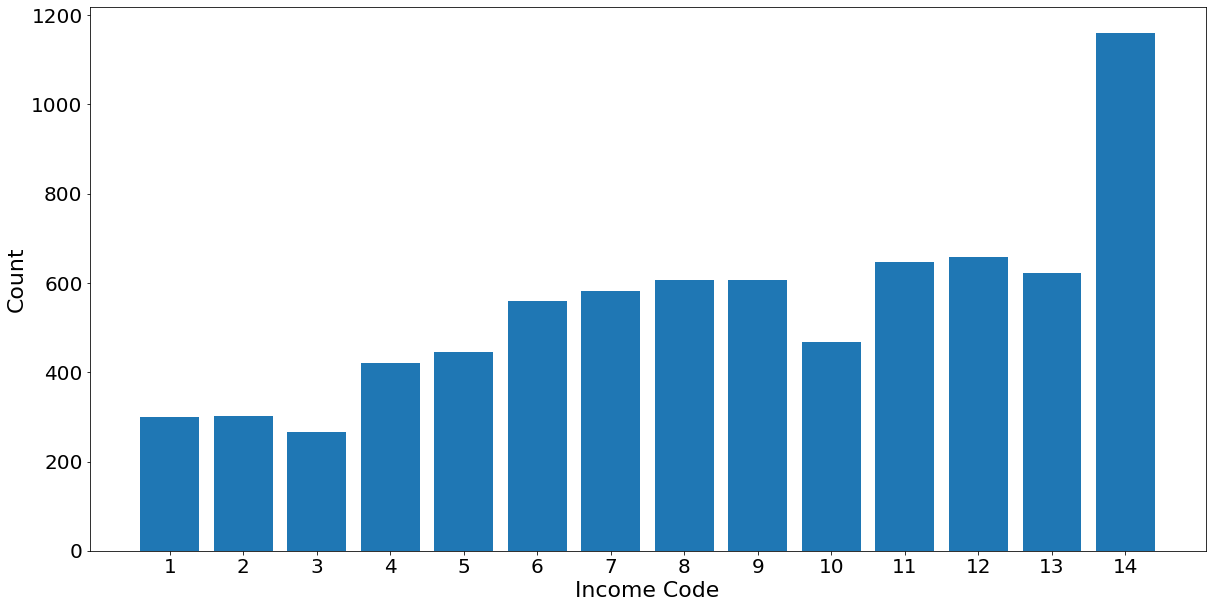

In [121]:
# Solution goes here

# Again, I realise this book has a built in Hist class based on matplotlib, intended for easy use here
# but for the sake of practice I want to get a better handle on using matplotlib (with pandas) itself

#####

# the recode totincr data is already binned, so a histogram here is the same as a bar chart of value_counts()
totincr_data = resp.totincr.value_counts().sort_index()

plt.figure(figsize = (20, 10))
plt.bar(totincr_data.index, totincr_data.values)
plt.xlabel('Income Code')
plt.ylabel('Count')
plt.xticks(range(1,15))
plt.show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

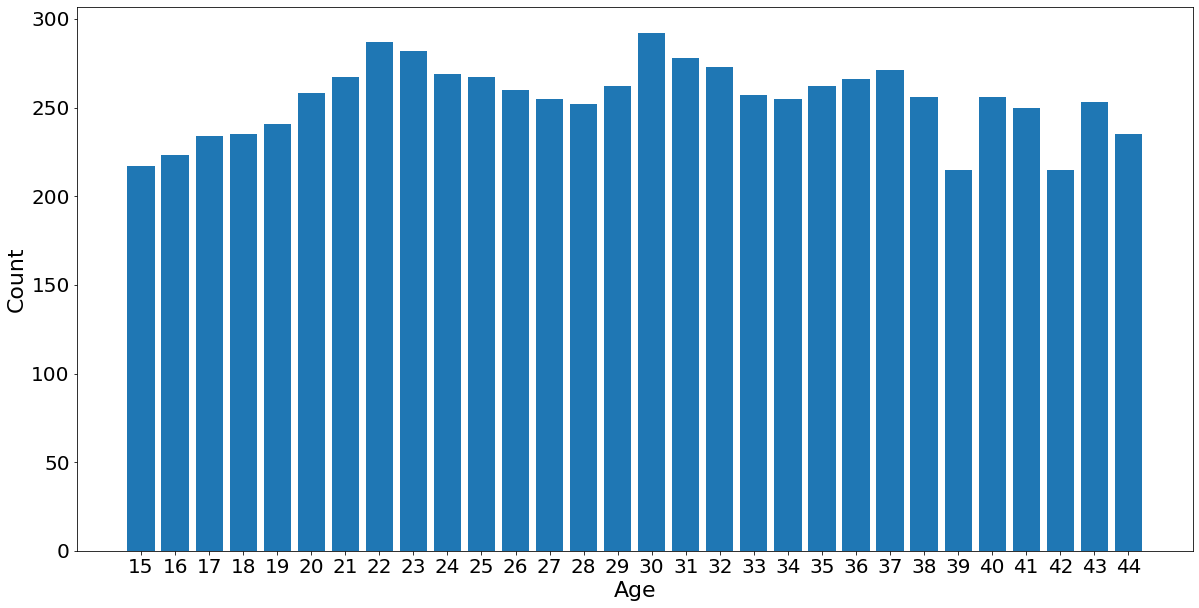

In [126]:
# Solution goes here

# Again, this data is already binned, no need to use plt.hist
age_data = resp.age_r.value_counts().sort_index()

plt.figure(figsize = (20,10))
plt.bar(age_data.index, age_data.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(age_data.index)
plt.show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

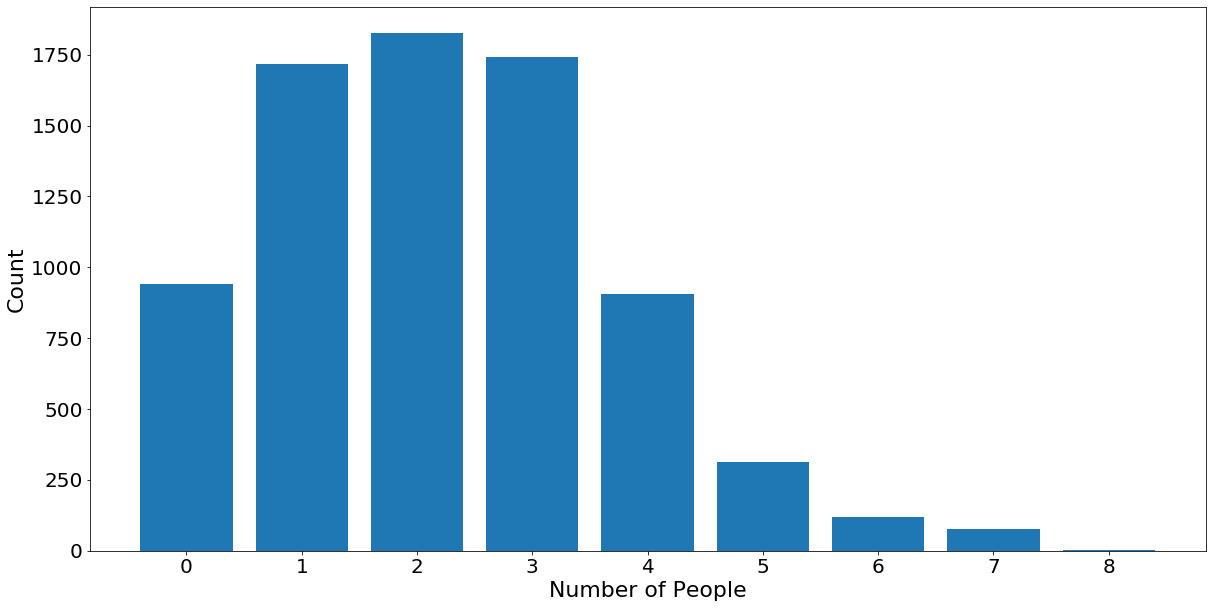

In [129]:
# Solution goes here

# this is the same

num_data = resp.numfmhh.value_counts().sort_index()

plt.figure(figsize = (20,10))
plt.bar(num_data.index, num_data.values)
plt.xlabel('Number of People')
plt.ylabel('Count')
plt.xticks(num_data.index)
plt.show()

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

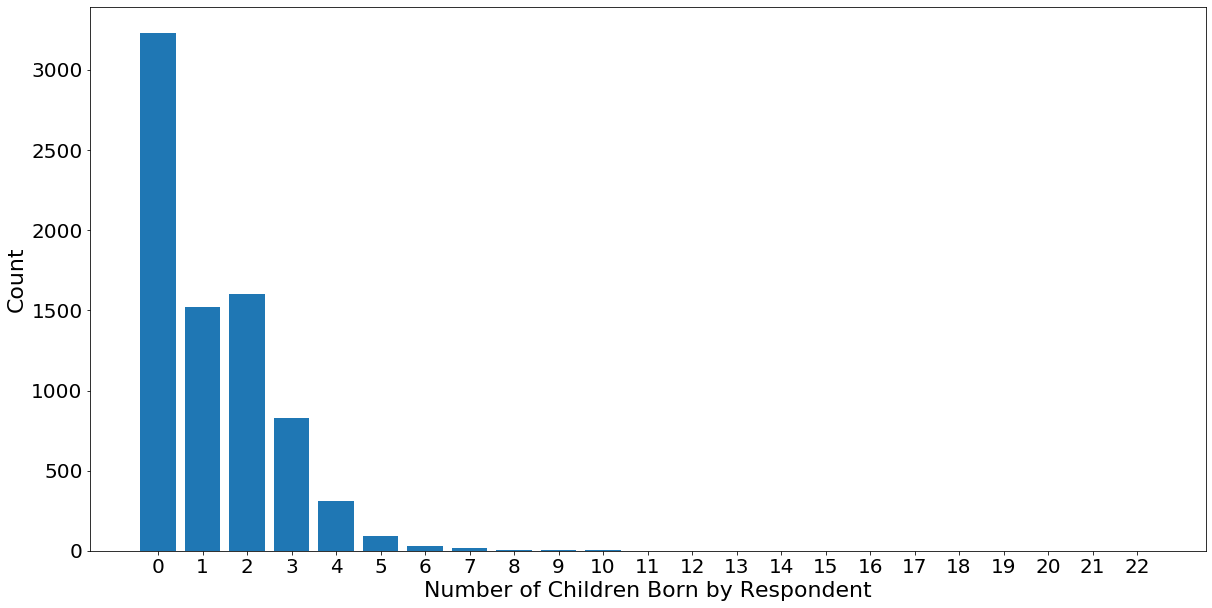

The distribution has a mode of 0 children overall, and one of 2 children for those respondents who have given birth. It tails to the right.


In [143]:
# Solution goes here

parity = resp.parity.value_counts().sort_index()

plt.figure(figsize = (20,10))
plt.bar(parity.index, parity.values)
plt.xlabel('Number of Children Born by Respondent')
plt.ylabel('Count')
plt.xticks(range(0, parity.index.max()+1))
plt.show()

print('The distribution has a mode of 0 children overall, and one of 2 children for those respondents who have given birth. It tails to the right.')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [160]:
# Solution goes here

# Question apparantly refers to largest INDEXES rather than values, calculated like so:
hist = thinkstats2.Hist(resp.parity)
print(hist.Largest(5))

# From wording of question 'largest values of parity', I would have guessed the largest VALUES
parity = resp.parity.value_counts().sort_index()
print(parity.nlargest(5))

# Can however also use generic pandas method to get largest indexes, after sort_index()
print(parity[-5:])

[(22, 1), (16, 1), (10, 3), (9, 2), (8, 8)]
0    3230
2    1603
1    1519
3     828
4     309
Name: parity, dtype: int64
8     8
9     2
10    3
16    1
22    1
Name: parity, dtype: int64


Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

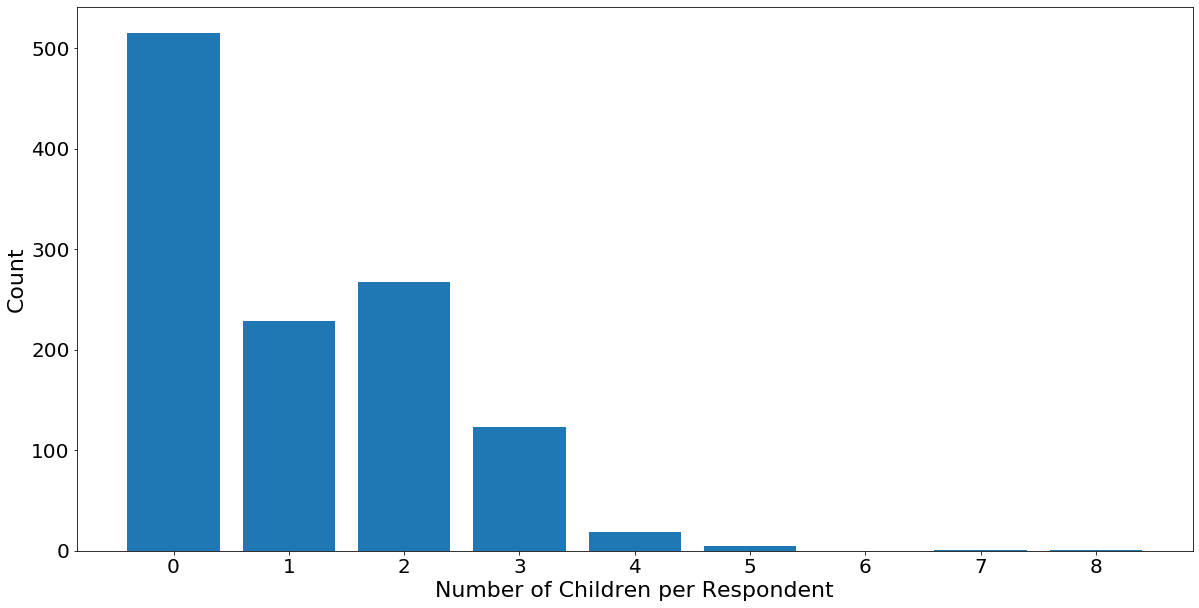

In [166]:
# Solution goes here

# so do people with higher income (totincr) have more children (parity) - ignoring that the data only mentions
# CURRENT income at time of response

# binned already, so bar of value_counts()

highest_par = resp[resp.totincr == 14].parity
data = highest_par.value_counts().sort_index()

plt.figure(figsize = (20,10))
plt.bar(data.index, data.values)
plt.xlabel('Number of Children per Respondent')
plt.ylabel('Count')
plt.xticks(range(0, data.index.max() + 1))
plt.show()

Find the largest parities for high income respondents.

In [168]:
# Solution goes here

data[-5:]

3    123
4     19
5      5
7      1
8      1
Name: parity, dtype: int64

Compare the mean <tt>parity</tt> for high income respondents and others.

In [172]:
# Solution goes here

print('Mean parity of high income respondents is:', highest_par.mean())

low_inc = resp[resp.totincr != 14]

print('Mean parity of other income respondents is:', low_inc.parity.mean())

Mean parity of high income respondents is: 1.0758620689655172
Mean parity of other income respondents is: 1.2495758136665125


Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [175]:
# Solution goes here

print(CohenEffectSize(highest_par, low_inc.parity))

# An effect size of -0.12 standard deviations is still small, but it is almost ten times bigger than the difference
# in pregnancy length for first babies and others

-0.1251185531466061
